In [4]:
import sys
print(sys.executable)

d:\Github\group1-project\.venv\Scripts\python.exe


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, MaxNLocator

In [6]:
df = pd.read_csv('ev_data.csv')

In [7]:
hist_mask = (
    (df['region_country'] == 'United Kingdom') &
    (df['powertrain'] == 'BEV') &
    (df['parameter'] == 'EV sales') &
    (df['mode'] == 'Cars') &
    (df['category'] == 'Historical')
)
df_hist = df.loc[hist_mask, ['year', 'value']].dropna().sort_values('year')
years_hist = df_hist['year'].to_numpy()
sales_hist = df_hist['value'].to_numpy() / 1e6

In [8]:
df_rf = pd.read_csv('ev_data_forecast.csv')

In [9]:
rf_mask = (
    (df_rf['region_country'] == 'United Kingdom') &
    (df_rf['powertrain'] == 'BEV') &
    (df_rf['parameter'] == 'EV sales') &
    (df_rf['mode'] == 'Cars') &
    (df_rf['category'] == 'Future')
)
df_rf_sel = df_rf.loc[rf_mask, ['year', 'value']].dropna().sort_values('year')
years_rf = df_rf['year'].to_numpy()
sales_rf = df_rf['value'].to_numpy() / 1e6

In [10]:
last_year = years_hist[-1]
last_sales = sales_hist[-1]

In [11]:
years_ext = np.concatenate(([last_year], years_rf))
sales_ext = np.concatenate(([last_sales], sales_rf))

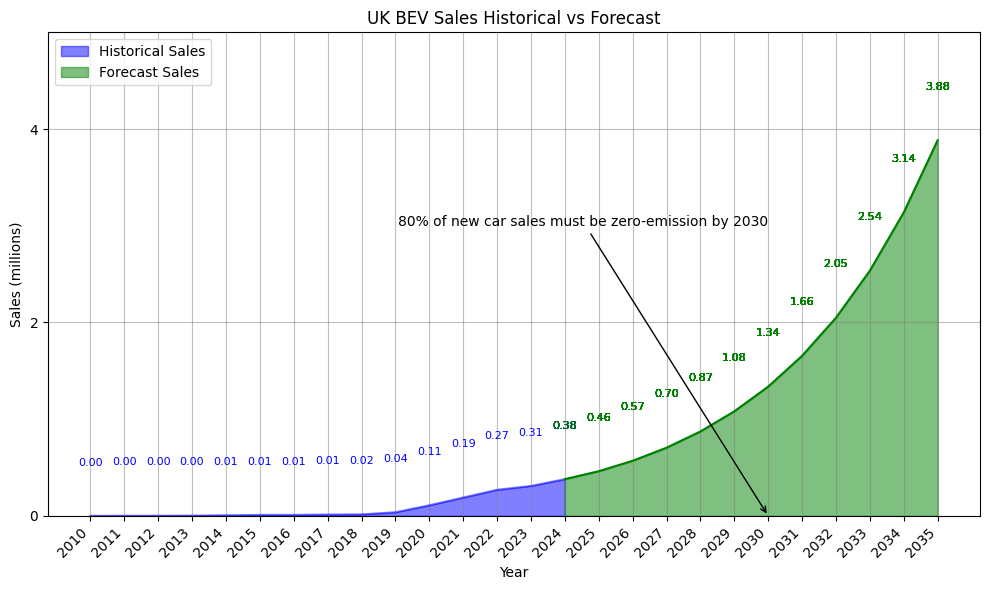

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.fill_between(years_hist, sales_hist, 0, color='blue', alpha=0.5, label='Historical Sales')
ax.plot (years_hist, sales_hist, color = 'blue', alpha=0.5, label=None)

ax.fill_between(years_ext, sales_ext, 0, color='green', alpha=0.5, label='Forecast Sales')
ax.plot(years_ext, sales_ext, color = 'green', label = None)

for x, y in zip(years_hist, sales_hist):
    ax.text(x, y + 0.5, f'{y:.2f}', ha='center', va='bottom', fontsize=8, color='blue')

    for x, y in zip(years_ext, sales_ext):
        ax.text(x, y + 0.5, f'{y:.2f}', ha='center', va='bottom', fontsize=8, color='green')

all_years = np.unique(np.concatenate((years_hist, years_rf)))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xticks(all_years)
ax.set_xticklabels(all_years, rotation=45, ha='right')
top = max(sales_hist.max(), sales_rf.max()) * 1.1
ax.set_ylim(0, 5)
ax.yaxis.set_major_locator(MultipleLocator(2))
ax.set_ylabel('Sales (millions)')
ax.set_xlabel('Year')
ax.set_title('UK BEV Sales Historical vs Forecast')
ax.legend()
ax.grid(True, linestyle='-', alpha=0.5, color='gray')

ymin, ymax = ax.get_ylim()
ax.annotate('80% of new car sales must be zero-emission by 2030', xy = (2030, 0), xytext = (2030, ymax * 0.6), arrowprops=dict(arrowstyle='->', lw=1, color='black'), ha = 'right')

plt.tight_layout()
plt.show()